# Unit 12 - Tales from the Crypto

---


## 1. Sentiment Analysis

Use the [newsapi](https://newsapi.org/) to pull the latest news articles for Bitcoin and Ethereum and create a DataFrame of sentiment scores for each coin.

Use descriptive statistics to answer the following questions:
1. Which coin had the highest mean positive score?
2. Which coin had the highest negative score?
3. Which coin had the highest positive score?

In [4]:
# Initial imports
import os
import pandas as pd
from dotenv import load_dotenv
from newsapi import NewsApiClient
import nltk as nltk
nltk.download('vader_lexicon')
from nltk.sentiment.vader import SentimentIntensityAnalyzer
analyzer = SentimentIntensityAnalyzer()

%matplotlib inline

[nltk_data] Downloading package vader_lexicon to
[nltk_data]     /Users/admin/nltk_data...
[nltk_data]   Package vader_lexicon is already up-to-date!


In [2]:
pip install newsapi-python

Note: you may need to restart the kernel to use updated packages.


In [7]:
# Reading in api key environment variable
load_dotenv()

api_key = os.getenv("NEWS_API_KEY")


In [9]:
# Creating a newsapi client
newsapi = NewsApiClient(api_key=api_key)

In [10]:
# Fetching the Bitcoin news articles
btc_headlines = newsapi.get_everything(q="bitcoin", language="en")
btc_headlines

{'status': 'ok',
 'totalResults': 8711,
 'articles': [{'source': {'id': 'the-verge', 'name': 'The Verge'},
   'author': 'Adi Robertson',
   'title': 'India will reportedly introduce bill to make owning cryptocurrency illegal',
   'description': 'India’s legislature is reportedly considering a near-total ban on private cryptocurrencies like Bitcoin or Ethereum, including owning the virtual currency. The government has discussed plans for a national digital currency as an alternative.',
   'url': 'https://www.theverge.com/2021/3/15/22332677/india-cryptocurrency-trading-mining-possession-ban-law-report',
   'urlToImage': 'https://cdn.vox-cdn.com/thumbor/IdgNJaOIQBsN8QbQcH2MDU6sAUA=/0x243:2040x1311/fit-in/1200x630/cdn.vox-cdn.com/uploads/chorus_asset/file/10432811/mdoying_180308_2373_0091still.jpg',
   'publishedAt': '2021-03-15T22:25:02Z',
   'content': 'One of the strictest crackdowns worldwide\r\nPhoto by Michele Doying / The Verge\r\nIndia is reportedly moving forward with a sweeping b

In [26]:
# Printing total articles
print(f"Total articles about bitcoin: {btc_headlines['totalResults']}")

# Showing a sample article
btc_headlines["articles"][0]

Total articles about bitcoin: 8711


{'source': {'id': 'the-verge', 'name': 'The Verge'},
 'author': 'Adi Robertson',
 'title': 'India will reportedly introduce bill to make owning cryptocurrency illegal',
 'description': 'India’s legislature is reportedly considering a near-total ban on private cryptocurrencies like Bitcoin or Ethereum, including owning the virtual currency. The government has discussed plans for a national digital currency as an alternative.',
 'url': 'https://www.theverge.com/2021/3/15/22332677/india-cryptocurrency-trading-mining-possession-ban-law-report',
 'urlToImage': 'https://cdn.vox-cdn.com/thumbor/IdgNJaOIQBsN8QbQcH2MDU6sAUA=/0x243:2040x1311/fit-in/1200x630/cdn.vox-cdn.com/uploads/chorus_asset/file/10432811/mdoying_180308_2373_0091still.jpg',
 'publishedAt': '2021-03-15T22:25:02Z',
 'content': 'One of the strictest crackdowns worldwide\r\nPhoto by Michele Doying / The Verge\r\nIndia is reportedly moving forward with a sweeping ban on cryptocurrencies. According to Reuters, the countrys legislat…

In [27]:
# Transforming the response dictionary to a DataFrame
btc_df = pd.DataFrame.from_dict(btc_headlines["articles"])

btc_df.head()

,author,content,description,publishedAt,source,title,url,urlToImage
0,Adi Robertson,One of the strictest crackdowns worldwide\r\nP...,India’s legislature is reportedly considering ...,2021-03-15T22:25:02Z,"{'id': 'the-verge', 'name': 'The Verge'}",India will reportedly introduce bill to make o...,https://www.theverge.com/2021/3/15/22332677/in...,https://cdn.vox-cdn.com/thumbor/IdgNJaOIQBsN8Q...
1,None,None,The digital cryptocurrency Bitcoin has tripled...,2021-02-20T17:12:04Z,"{'id': 'cnn', 'name': 'CNN'}",Is Bitcoin a safe bet?,https://www.cnn.com/videos/business/2021/02/20...,https://cdn.cnn.com/cnnnext/dam/assets/2102201...
2,Jack Morse,Some things are best left a mystery at least a...,Some things are best left a mystery — at least...,2021-02-26T00:40:52Z,"{'id': 'mashable', 'name': 'Mashable'}",Coinbase says unmasking Satoshi Nakamoto might...,https://mashable.com/article/coinbase-direct-l...,https://mondrian.mashable.com/2021%252F02%252F...
3,"Julia Horowitz, CNN Business",None,With the value of bitcoin in the market toppin...,2021-02-21T13:50:55Z,"{'id': 'cnn', 'name': 'CNN'}",How bitcoin is like a teenager,https://www.cnn.com/2021/02/21/investing/stock...,https://cdn.cnn.com/cnnnext/dam/assets/2011240...
4,None,,"William Quigley, managing director of Magnetic...",2021-03-03T19:10:57Z,"{'id': 'cnn', 'name': 'CNN'}",Why bitcoin could triple over next year,https://www.cnn.com/videos/business/2021/03/03...,https://cdn.cnn.com/cnnnext/dam/assets/2102190...


In [11]:
# Fetching the Ethereum news articles
eth_headlines = newsapi.get_everything(q="ethereum", language="en")
eth_headlines

{'status': 'ok',
 'totalResults': 2108,
 'articles': [{'source': {'id': 'the-verge', 'name': 'The Verge'},
   'author': 'Justine Calma',
   'title': 'The climate controversy swirling around NFTs',
   'description': 'Most NFTs are bought and sold with Ethereum, a cryptocurrency that guzzles up energy and pumps out a lot of greenhouse gas emissions. Artists are fighting over whether there can be a more sustainable future for crypto art.',
   'url': 'https://www.theverge.com/2021/3/15/22328203/nft-cryptoart-ethereum-blockchain-climate-change',
   'urlToImage': 'https://cdn.vox-cdn.com/thumbor/pYrvxU6TUFVYkAwb6h1U4BPYMj0=/0x431:6000x3572/fit-in/1200x630/cdn.vox-cdn.com/uploads/chorus_asset/file/22366636/1230723200.jpg',
   'publishedAt': '2021-03-15T13:51:11Z',
   'content': 'Famed auction house Christies just sold its first purely digital piece of art for a whopping $69 million. For that price, the buyer got a digital file of a collage of 5,000 images and a complex legac… [+12891 chars]'}

In [28]:
# Printing total articles
print(f"Total articles about ethereum: {eth_headlines['totalResults']}")

# Showing a sample article
eth_headlines["articles"][0]

Total articles about ethereum: 2108


{'source': {'id': 'the-verge', 'name': 'The Verge'},
 'author': 'Justine Calma',
 'title': 'The climate controversy swirling around NFTs',
 'description': 'Most NFTs are bought and sold with Ethereum, a cryptocurrency that guzzles up energy and pumps out a lot of greenhouse gas emissions. Artists are fighting over whether there can be a more sustainable future for crypto art.',
 'url': 'https://www.theverge.com/2021/3/15/22328203/nft-cryptoart-ethereum-blockchain-climate-change',
 'urlToImage': 'https://cdn.vox-cdn.com/thumbor/pYrvxU6TUFVYkAwb6h1U4BPYMj0=/0x431:6000x3572/fit-in/1200x630/cdn.vox-cdn.com/uploads/chorus_asset/file/22366636/1230723200.jpg',
 'publishedAt': '2021-03-15T13:51:11Z',
 'content': 'Famed auction house Christies just sold its first purely digital piece of art for a whopping $69 million. For that price, the buyer got a digital file of a collage of 5,000 images and a complex legac… [+12891 chars]'}

In [29]:
# Transforming the response dictionary to a DataFrame
eth_df = pd.DataFrame.from_dict(eth_headlines["articles"])

eth_df.head()

,author,content,description,publishedAt,source,title,url,urlToImage
0,Justine Calma,Famed auction house Christies just sold its fi...,"Most NFTs are bought and sold with Ethereum, a...",2021-03-15T13:51:11Z,"{'id': 'the-verge', 'name': 'The Verge'}",The climate controversy swirling around NFTs,https://www.theverge.com/2021/3/15/22328203/nf...,https://cdn.vox-cdn.com/thumbor/pYrvxU6TUFVYkA...
1,Adi Robertson,One of the strictest crackdowns worldwide\r\nP...,India’s legislature is reportedly considering ...,2021-03-15T22:25:02Z,"{'id': 'the-verge', 'name': 'The Verge'}",India will reportedly introduce bill to make o...,https://www.theverge.com/2021/3/15/22332677/in...,https://cdn.vox-cdn.com/thumbor/IdgNJaOIQBsN8Q...
2,Jon Fingas,Worried that the GeForce RTX 3060 will be sold...,Worried that the GeForce RTX 3060 will be sold...,2021-02-18T16:16:57Z,"{'id': 'engadget', 'name': 'Engadget'}",NVIDIA limits RTX 3060 crypto speeds as it int...,https://www.engadget.com/nvidia-limits-rtx-306...,https://s.yimg.com/uu/api/res/1.2/VLoRobjl1FcF...
3,Danica D'Souza,Here's everything you need to know about non-f...,Here's everything you need to know about non-f...,2021-03-16T18:30:28Z,"{'id': 'mashable', 'name': 'Mashable'}","A beginner's guide to NFTs, the crypto potenti...",https://mashable.com/video/what-is-an-nft-expl...,https://mondrian.mashable.com/2021%252F03%252F...
4,Stan Schroeder,NFTs are the latest cryptocurrency rage these ...,NFTs are the latest cryptocurrency rage these ...,2021-03-06T14:00:00Z,"{'id': 'mashable', 'name': 'Mashable'}",What are NFTs? Everything you need to know.,https://mashable.com/article/nft-explainer-wha...,https://mondrian.mashable.com/2021%252F03%252F...


In [32]:
# Creating the Bitcoin sentiment scores DataFrame
btc_sentiments = []

for article in btc_headlines["articles"]:
    try:
        text = article["content"]
        date = article["publishedAt"][:10]
        sentiment = analyzer.polarity_scores(text)
        compound = sentiment["compound"]
        pos = sentiment["pos"]
        neu = sentiment["neu"]
        neg = sentiment["neg"]
        
        btc_sentiments.append({
            "text": text,
            "date": date,
            "compound": compound,
            "positive": pos,
            "negative": neg,
            "neutral": neu
            
        })
        
    except AttributeError:
        pass
    
# Creating DataFrame
btc_df2 = pd.DataFrame(btc_sentiments)

# Reordering DataFrame columns
cols = ["date", "text", "compound", "positive", "negative", "neutral"]
btc_df2 = btc_df[cols]

btc_df2.head()

,date,text,compound,positive,negative,neutral
0,2021-03-15,One of the strictest crackdowns worldwide\r\nP...,-0.5574,0.000,0.11,0.890
1,2021-02-26,Some things are best left a mystery at least a...,0.6369,0.113,0.00,0.887
2,2021-03-03,,0.0000,0.000,0.00,0.000
3,2021-02-16,"Bitcoin is the future, again: this morning, it...",0.7041,0.140,0.00,0.860
4,2021-02-25,TL;DR: Enter the The Complete Bitcoin (BTC) In...,0.8316,0.246,0.00,0.754


In [34]:
# Creating the Ethereum sentiment scores DataFrame
eth_sentiments = []

for article in eth_headlines["articles"]:
    try:
        text = article["content"]
        date = article["publishedAt"][:10]
        sentiment = analyzer.polarity_scores(text)
        compound = sentiment["compound"]
        pos = sentiment["pos"]
        neu = sentiment["neu"]
        neg = sentiment["neg"]
        
        eth_sentiments.append({
            "text": text,
            "date": date,
            "compound": compound,
            "positive": pos,
            "negative": neg,
            "neutral": neu
            
        })
        
    except AttributeError:
        pass
    
# Creating a DataFrame
eth_df2 = pd.DataFrame(eth_sentiments)

# Reordering DataFrame columns
cols = ["date", "text", "compound", "positive", "negative", "neutral"]
eth_df2 = eth_df2[cols]

eth_df2.head()


,date,text,compound,positive,negative,neutral
0,2021-03-15,Famed auction house Christies just sold its fi...,0.0000,0.000,0.000,1.000
1,2021-03-15,One of the strictest crackdowns worldwide\r\nP...,-0.5574,0.000,0.110,0.890
2,2021-02-18,Worried that the GeForce RTX 3060 will be sold...,-0.3400,0.063,0.119,0.818
3,2021-03-16,Here's everything you need to know about non-f...,-0.1531,0.000,0.062,0.938
4,2021-03-06,NFTs are the latest cryptocurrency rage these ...,-0.4588,0.066,0.145,0.789


In [35]:
# Describing the Bitcoin Sentiment
btc_df2.describe()

,compound,positive,negative,neutral
count,18.000000,18.000000,18.000000,18.000000
mean,0.197322,0.063000,0.015278,0.866222
std,0.395534,0.072133,0.035829,0.227050
min,-0.557400,0.000000,0.000000,0.000000
25%,0.000000,0.000000,0.000000,0.856250
50%,0.051350,0.055000,0.000000,0.917500
75%,0.559650,0.106750,0.000000,0.989500
max,0.831600,0.246000,0.110000,1.000000


In [36]:
# Describing the Ethereum Sentiment
eth_df2.describe()

,compound,positive,negative,neutral
count,20.000000,20.000000,20.000000,20.000000
mean,0.160720,0.071850,0.031950,0.896200
std,0.409982,0.065296,0.048716,0.070948
min,-0.557400,0.000000,0.000000,0.754000
25%,-0.038275,0.000000,0.000000,0.859750
50%,0.160900,0.068500,0.000000,0.899500
75%,0.473275,0.112250,0.064500,0.938250
max,0.831600,0.246000,0.145000,1.000000


### Questions:

Q: Which coin had the highest mean positive score?

A: Ethereum had a higher mean positive score. 

Q: Which coin had the highest compound score?

A: Bitcoin had a higher compound score. 

Q. Which coin had the highest positive score?

A: Ethereum had the highest positive score. 

---

## 2. Natural Language Processing
---
###   Tokenizer

In this section, you will use NLTK and Python to tokenize the text for each coin. Be sure to:
1. Lowercase each word.
2. Remove Punctuation.
3. Remove Stopwords.

In [17]:
from nltk.tokenize import word_tokenize, sent_tokenize
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer, PorterStemmer
from string import punctuation
import re

In [91]:
# Instantiate the lemmatizer
lemmatizer = WordNetLemmatizer()

# Create a list of stopwords
sw = set(stopwords.words('english'))

# Expand the default stopwords list if necessary
# YOUR CODE HERE!

In [92]:
# Complete the tokenizer function
def tokenizer(text):
    """Tokenizes text."""
    # Remove the stop words
    sw = set(stopwords.words('english'))
    
    # Remove the punctuation from text
    regex = re.compile("[^a-zA-Z ]")
    re_clean = regex.sub('', text)

    # Create a tokenized list of the words
    words = word_tokenize(re_clean)
    
    # Lemmatize words into root words
    lem = [lemmatizer.lemmatize(word) for word in words]


    # Convert the words to lowercase
    output = [word.lower() for word in words if word.lower() not in sw]
    
    
    return output


In [111]:
tokenizer(str(btc_df2['tokens']))

['one',
 'strictest',
 'crackdowns',
 'worldwidephoto',
 'things',
 'best',
 'left',
 'mystery',
 'least',
 'far',
 'coin',
 'bitcoin',
 'future',
 'morning',
 'hit',
 'alltime',
 'high',
 'tldr',
 'enter',
 'complete',
 'bitcoin',
 'btc',
 'investme',
 'proposed',
 'law',
 'india',
 'would',
 'make',
 'crime',
 'min',
 'new',
 'york',
 'cnn',
 'businessbitcoins',
 'roller',
 'coa',
 'blockchaincom',
 'announced',
 'raised',
 'million',
 'fu',
 'morning',
 'coinbase',
 'american',
 'cryptocurrency',
 'february',
 'min',
 'readthis',
 'story',
 'originally',
 'reuters',
 'stafffile',
 'photo',
 'collection',
 'bitcoi',
 'reuters',
 'stafffile',
 'photo',
 'representations',
 'v',
 'reuters',
 'stafffeb',
 'reuters',
 'bitcoin',
 'continue',
 'reuters',
 'staffcryptocurrency',
 'mining',
 'facilit',
 'toronto',
 'feb',
 'cnw',
 'evolvefunds',
 'group',
 'incevo',
 'cryptocurrency',
 'market',
 'encountered',
 'major',
 'h',
 'posters',
 'participatingthe',
 'price',
 'one',
 'bitcoi',
 '

In [60]:
# Create a new tokens column for Bitcoin
btc_tokens = []

[btc_tokens.append(tokenizer(text)) for text in btc_df2.text]   
btc_df2['tokens'] = btc_tokens
btc_df2.head()

/Users/admin/opt/anaconda3/envs/pyvizenv/lib/python3.7/site-packages/ipykernel_launcher.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  


,date,text,compound,positive,negative,neutral,tokens
0,2021-03-15,One of the strictest crackdowns worldwide\r\nP...,-0.5574,0.000,0.11,0.890,"[one, strictest, crackdowns, worldwidephoto, m..."
1,2021-02-26,Some things are best left a mystery at least a...,0.6369,0.113,0.00,0.887,"[things, best, left, mystery, least, far, coin..."
2,2021-03-03,,0.0000,0.000,0.00,0.000,[]
3,2021-02-16,"Bitcoin is the future, again: this morning, it...",0.7041,0.140,0.00,0.860,"[bitcoin, future, morning, hit, alltime, high,..."
4,2021-02-25,TL;DR: Enter the The Complete Bitcoin (BTC) In...,0.8316,0.246,0.00,0.754,"[tldr, enter, complete, bitcoin, btc, investme..."


In [61]:
# Create a new tokens column for Ethereum
eth_tokens = []

[eth_tokens.append(tokenizer(text)) for text in eth_df2.text]   
eth_df2['tokens'] = eth_tokens
eth_df2.head()

,date,text,compound,positive,negative,neutral,tokens
0,2021-03-15,Famed auction house Christies just sold its fi...,0.0000,0.000,0.000,1.000,"[famed, auction, house, christies, sold, first..."
1,2021-03-15,One of the strictest crackdowns worldwide\r\nP...,-0.5574,0.000,0.110,0.890,"[one, strictest, crackdowns, worldwidephoto, m..."
2,2021-02-18,Worried that the GeForce RTX 3060 will be sold...,-0.3400,0.063,0.119,0.818,"[worried, geforce, rtx, sold, cryptocurrency, ..."
3,2021-03-16,Here's everything you need to know about non-f...,-0.1531,0.000,0.062,0.938,"[heres, everything, need, know, nonfungible, t..."
4,2021-03-06,NFTs are the latest cryptocurrency rage these ...,-0.4588,0.066,0.145,0.789,"[nfts, latest, cryptocurrency, rage, days, ban..."


---

### NGrams and Frequency Analysis

In this section you will look at the ngrams and word frequency for each coin. 

1. Use NLTK to produce the n-grams for N = 2. 
2. List the top 10 words for each coin. 

In [37]:
from collections import Counter
from nltk import ngrams

In [112]:
btc_tokenized = tokenizer(str(btc_df2['tokens']))

In [113]:
# Generate the Bitcoin N-grams where N=2
btc_ngrams = ngrams(btc_tokenized, n=2)

In [121]:
# Function token_count generates the top 10 words for a given coin
def token_count(tokens, N=3):
    """Returns the top N tokens from the frequency count"""
    return Counter(tokens).most_common(N)

In [114]:
# Use token_count to get the top 10 words for Bitcoin
btc_top_10 = token_count(btc_ngrams, N=10)

In [115]:
print(btc_top_10)

[(('reuters', 'stafffile'), 2), (('stafffile', 'photo'), 2), (('one', 'strictest'), 1), (('strictest', 'crackdowns'), 1), (('crackdowns', 'worldwidephoto'), 1), (('worldwidephoto', 'things'), 1), (('things', 'best'), 1), (('best', 'left'), 1), (('left', 'mystery'), 1), (('mystery', 'least'), 1)]


In [120]:
# Generate the Ethereum N-grams where N=2
eth_ngrams = ngrams(eth_tokenized, n=2)

In [119]:
eth_tokenized = tokenizer(str(eth_df2['tokens']))

In [123]:
# Use token_count to get the top 10 words for Ethereum
eth_top_10 = token_count(eth_ngrams, N=10)

---

In [124]:
eth_top_10 

[(('new', 'york'), 2),
 (('reuters', 'ethereum'), 2),
 (('ethereum', 'second'), 2),
 (('famed', 'auction'), 1),
 (('auction', 'house'), 1),
 (('house', 'christies'), 1),
 (('christies', 'sold'), 1),
 (('sold', 'first'), 1),
 (('first', 'one'), 1),
 (('one', 'strictest'), 1)]

### Word Clouds

In this section, you will generate word clouds for each coin to summarize the news for each coin

In [128]:
from wordcloud import WordCloud
import matplotlib.pyplot as plt
plt.style.use('seaborn-whitegrid')
import matplotlib as mpl
mpl.rcParams['figure.figsize'] = [20.0, 10.0]

In [130]:
def process_text(doc):
    sw = set(stopwords.words('english'))
    regex = re.compile("[^a-zA-Z ]")
    re_clean = regex.sub('', doc)
    words = word_tokenize(re_clean)
    lem = [lemmatizer.lemmatize(word) for word in words]
    output = [word.lower() for word in lem if word.lower() not in sw]
    return ' '.join(output)

In [132]:
big_string = ' '.join(text)
input_text = process_text(big_string)

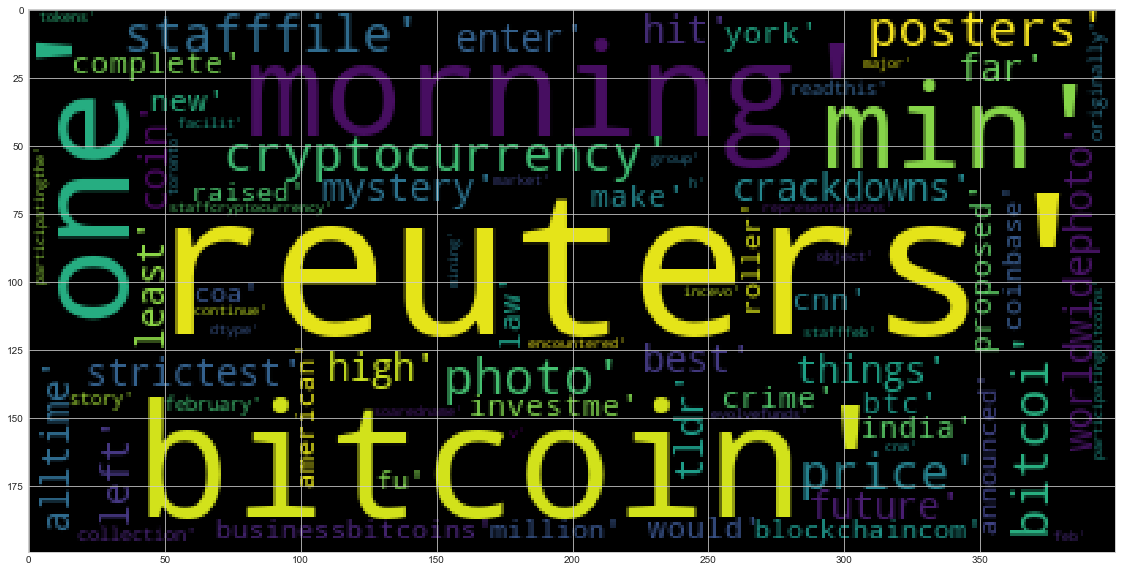

In [138]:
# Generate the Bitcoin word cloud
btc_wc = WordCloud().generate(str(tokenizer(str(btc_df2['tokens']))))
plt.imshow(btc_wc)

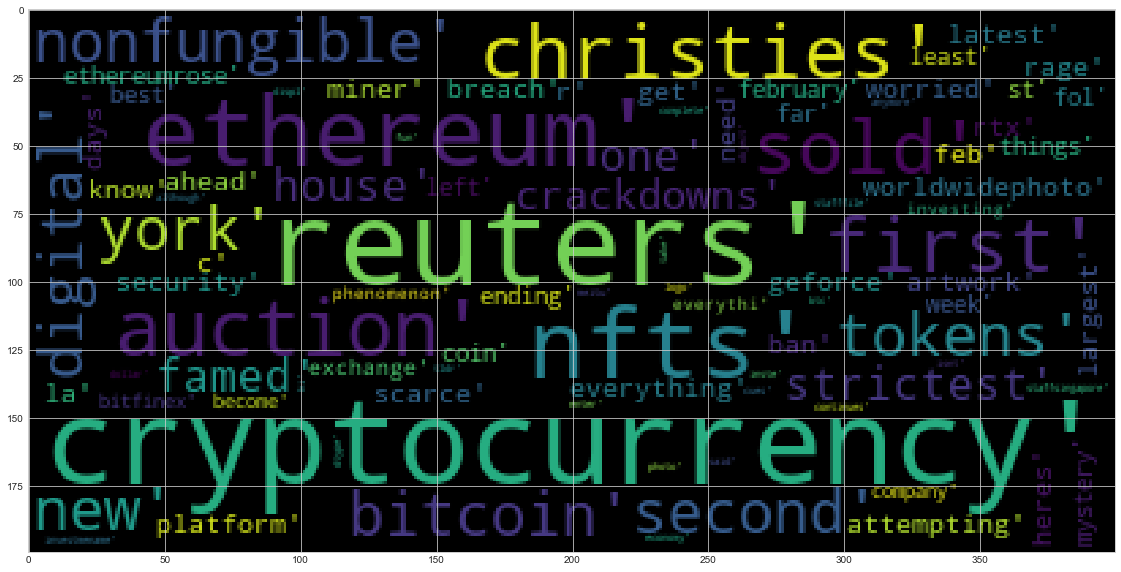

In [140]:
# Generate the Ethereum word cloud
eth_wc = WordCloud().generate(str(tokenizer(str(eth_df2['tokens']))))
plt.imshow(eth_wc)

---
## 3. Named Entity Recognition

In this section, you will build a named entity recognition model for both Bitcoin and Ethereum, then visualize the tags using SpaCy.

In [141]:
import spacy
from spacy import displacy

In [149]:
# Download the language model for SpaCy
# !python -m spacy download en_core_web_sm

In [143]:
# Load the spaCy model
nlp = spacy.load('en_core_web_sm')

---
### Bitcoin NER

In [144]:
# Concatenate all of the Bitcoin text together
btc_text = ""
for i in range(0, len(btc_df2)):
    btc_text += str(btc_df2.text[i])

In [145]:
# Run the NER processor on all of the text
btc_ner_processor = nlp(btc_text)

# Add a title to the document
btc_ner_processor.user_data["title"] = "Bitcoin NER"

In [146]:
# Render the visualization
displacy.render(btc_ner_processor, style = 'ent')

In [148]:
# List all Entities
btc_entities = [ent.text for ent in btc_ner_processor.ents]
btc_entities

['One',
 'Photo',
 'Michele Doying',
 'India',
 'Reuters',
 'Coinbase',
 'San Francisco',
 'last year',
 'Thursday',
 'this morning',
 'over $50,000',
 'over $12,000',
 'India',
 'Reuters',
 'CNN',
 'above $58,000',
 'Sunday',
 'just above $46,000',
 'Tuesday',
 'chars]Blockchain.com',
 '$120 million',
 'Moore Strategic Ventu',
 'chars]This morning',
 'Coinbase',
 'American',
 '19, 2021',
 'Elon Musk',
 'Binance',
 'Changp',
 'Reuters',
 'Dec. 8, 2017',
 'Benoit Tessier/Illustration',
 'Reuters',
 'Reuters',
 'Bitcoin',
 'January 21, 2021',
 'Reuters',
 'Reuters',
 'Feb 21',
 'Reuters',
 'Sunday',
 'two-month',
 '$1 trillion',
 'Friday',
 'Reuters',
 'Pristina',
 'Kosovo',
 'June 12, 2018',
 'HONG KONG',
 'Reuters Breakingviews',
 'Feb. 19, 2021',
 'Evolve',
 'week of February',
 'North American',
 '7',
 'one',
 'above $50,000',
 'Tuesday',
 'morning',
 'noon',
 'Eastern Time',
 'around $48,500',
 'Bitcoin',
 '4',
 'Bitcoin',
 'past $56,000',
 'Friday',
 '$1 trillion']

---

### Ethereum NER

In [150]:
# Concatenate all of the Ethereum text together
eth_text = ""
for i in range(0, len(eth_df2)):
    eth_text += str(eth_df2.text[i])

In [151]:
# Run the NER processor on all of the text
eth_ner_processor = nlp(eth_text)

# Add a title to the document
eth_ner_processor.user_data["title"] = "Ethereum NER"

In [152]:
# Render the visualization
displacy.render(eth_ner_processor, style = 'ent')

In [153]:
# List all Entities
eth_entities = [ent.text for ent in eth_ner_processor.ents]
eth_entities

['Christies',
 'first',
 '$69 million',
 '5,000',
 'Photo',
 'Michele Doying',
 'India',
 'Reuters',
 'GeForce',
 '3060',
 'GPU',
 'these days',
 'Kings',
 'NBA',
 'millions',
 'Ethereum',
 'first',
 "Christie's",
 'NFT',
 'a few days',
 'Chris Torres',
 '3060',
 'GPU',
 'next week',
 'Nvidia',
 'this morning',
 'about $5.7 million',
 'chars]NEW YORK',
 'Reuters',
 'second',
 'Thursday',
 'chars]NEW YORK',
 'Feb 18',
 'Reuters',
 'second',
 'Thursday',
 '7.34%',
 'the week ending 21st February',
 '11.65%',
 'the previous week',
 'Ethereum ended',
 'the week',
 '1,935.57',
 'the week',
 'Coinbase',
 'San Francisco',
 'last year',
 'Thursday',
 'Bitfinex',
 'Bitfinex',
 'millions of dollars',
 'Reuters',
 'SINGAPORE',
 'Reuters',
 'Asian',
 'Saturday',
 'two-month',
 '$1 trillion',
 'a day earlier',
 'World FX',
 'Kevin Buckland',
 'Reuters',
 'Meitu',
 'Hong Kong',
 'China',
 'March 24, 2017',
 'Bobby Yip',
 'HONG KONG',
 'Reuters',
 'Hong Ko',
 'more than a year ago',
 'Ethereum',
 'ov

---